Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

        High       0.74      0.78      0.76       815
         Low       0.71      0.79      0.75       776
      Medium       0.53      0.44      0.48       763

    accuracy                           0.67      2354
   macro avg       0.66      0.67      0.66      2354
weighted avg       0.66      0.67      0.66      2354


Confusion Matrix:
[[632  29 154]
 [ 20 612 144]
 [202 224 337]]


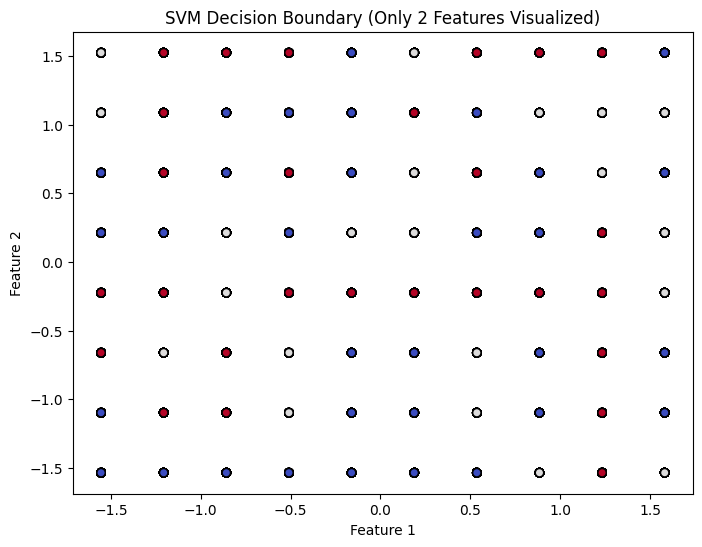

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
file_path = r"C:\Users\Sanjay\Desktop\ML Tutorial\archive\laptop_prices.csv"
df = pd.read_csv(file_path)

# Convert Storage to numerical format (handling missing values)
df['Storage'] = df['Storage'].str.extract(r'(\d+)').dropna().astype(float)

# Convert Resolution to total pixel count
df[['Width', 'Height']] = df['Resolution'].str.split('x', expand=True).astype(float)
df['Total_Pixels'] = df['Width'] * df['Height']
df.drop(columns=['Resolution', 'Width', 'Height'], inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ['Brand', 'Processor', 'GPU', 'Operating System']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Convert price into categories (Low, Medium, High)
df['Price Category'] = pd.qcut(df['Price ($)'], q=3, labels=['Low', 'Medium', 'High'])

# Define features and target variable
X = df.drop(columns=['Price ($)', 'Price Category'])
y = df['Price Category']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Support Vector Machine (SVM) Classifier
svm_model = SVC(kernel='linear', C=1.0)  # Linear Kernel
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualization (Only for 2D data, choosing first two features)
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.astype('category').cat.codes, cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary (Only 2 Features Visualized)")
plt.show()
